# Face Emotion Detector using Deep Learning Case Study

Human Emotion detection from image is one of the most powerful and challenging research task in social communication. Deep learning (DL) based emotion detection gives performance better than traditional methods with image processing.

three main steps: 
1. face detection, 
2. features extraction
3. emotion classification.

### Table of Contents


1.   Data Collection
2.   Importing required libraries
3.   Exploratory Data Analysis
4.   Data Agumentation & Preprocessing
5.   Model without Transfer Learnig
6.   Model with Tranfer Learning
7.   Model Valiation



## 1. Data Collection

In [1]:
!wget --header="Host: codeload.github.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.81 Safari/537.36 Edg/104.0.1293.47" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://github.com/charanhu/Emotion-Finder-using-Convolutional-Neural-Network" --header="Cookie: _octo=GH1.1.1557737145.1647599145; logged_in=yes; dotcom_user=charanhu; color_mode=%7B%22color_mode%22%3A%22dark%22%2C%22light_theme%22%3A%7B%22name%22%3A%22light%22%2C%22color_mode%22%3A%22light%22%7D%2C%22dark_theme%22%3A%7B%22name%22%3A%22dark%22%2C%22color_mode%22%3A%22dark%22%7D%7D; preferred_color_mode=dark; tz=Asia%2FCalcutta" --header="Connection: keep-alive" "https://codeload.github.com/charanhu/Emotion-Finder-using-Convolutional-Neural-Network/zip/refs/heads/main" -c -O 'Emotion-Finder-using-Convolutional-Neural-Network-main.zip'

--2022-08-23 04:55:59--  https://codeload.github.com/charanhu/Emotion-Finder-using-Convolutional-Neural-Network/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Emotion-Finder-using-Convolutional-Neural-Network-main.zip’

Emotion-Finder-usin     [               <=>  ]  78.56M  18.5MB/s    in 4.3s    

2022-08-23 04:56:04 (18.2 MB/s) - ‘Emotion-Finder-using-Convolutional-Neural-Network-main.zip’ saved [82376915]



In [2]:
!unzip Emotion-Finder-using-Convolutional-Neural-Network-main.zip

Streaming output truncated to the last 5000 lines.
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65437377.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_6545735.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65463385.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65473985.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65502829.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65505359.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65508578.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65516023.jpg  
 extracting: Emotion-Finder-using-Convolutional-Neural-Network-main/data/train/sad/Training_65

## 2. Importing required Libraries

In [3]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import itertools
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

## 3. Exploratory data analysis

In [4]:
train_data = "/content/data/train" #passing the path with training images
test_data = "/content/data/test"  #passing the path with testing images

In [17]:
#function for display sample images

def display(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

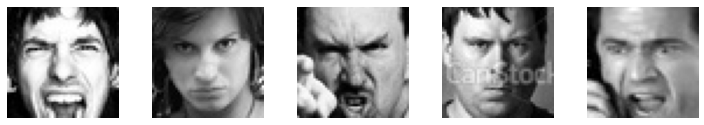

In [18]:
#sample angry images

display(train_data+'/angry')

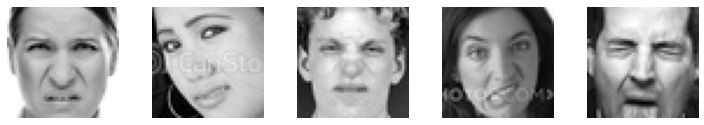

In [19]:
#sample disgust images

display(train_data+'/disgust')

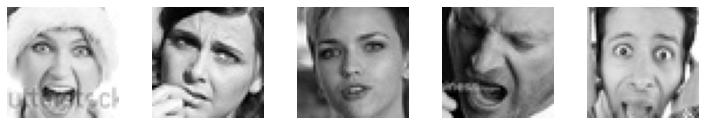

In [20]:
#sample fear images

display(train_data+'/fear')

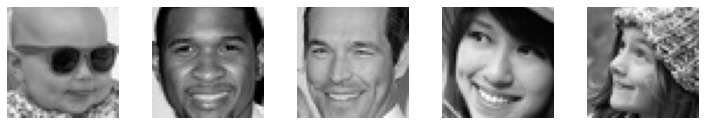

In [21]:
#sample happy images

display(train_data+'/happy')

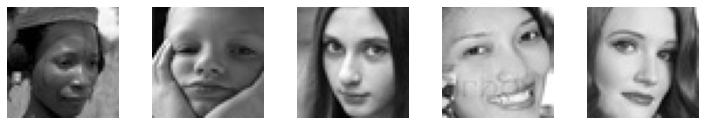

In [22]:
#sample neutral images

display(train_data+'/neutral')

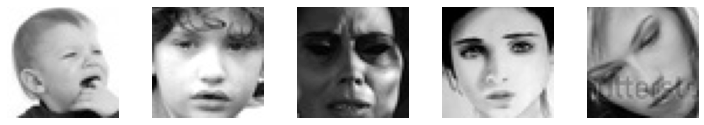

In [23]:
#sample sad images

display(train_data+'/sad')

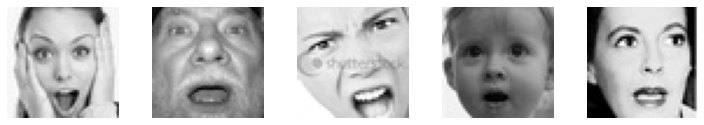

In [24]:
#sample surprise images

display(train_data+'/surprise')

### Bar Chart plotting

In [25]:
# function to bar chart

def plot_bar_chart(data_path):
  dic={}                                        # dictinery to store each emotion count in key value pairs
  for emotion in  os.listdir(data_path):        # for each emotion folder in data
    dem=0                                       # to count the perticular emotion images of that folder
    for x in os.listdir(data_path+"/"+emotion): # for each image 
      dem+=1                                    # increment by 1 
    dic[emotion]=dem                            # store final value at dictionry
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))   # plot of emotions vs count
  #set color
  plt.show()

{'angry': 3995, 'surprise': 3171, 'neutral': 4965, 'sad': 4830, 'happy': 7215, 'fear': 4097, 'disgust': 436}


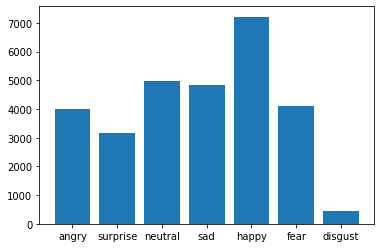

In [26]:
#bar plot of train data
plot_bar_chart(train_data)

{'angry': 958, 'surprise': 831, 'neutral': 1233, 'sad': 1247, 'happy': 1774, 'fear': 1024, 'disgust': 111}


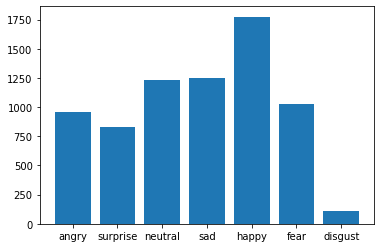

In [27]:
#bar plot of test data
plot_bar_chart(test_data)

Observations:
1. By the above two graphs we can see that disgust emotion images are few comapraed other emotions

## 4. Data Augumentation & Preprocessing

In [28]:
image_size=48

In [29]:
train_data_generator=ImageDataGenerator(width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        horizontal_flip=True,
                                        rescale=1./255)

In [30]:
validate_data_generator=ImageDataGenerator(rescale=1./255)

In [31]:
#train data preprocessing

train_gen=train_data_generator.flow_from_directory('/content/data/train',
                                                   target_size=(48,48),
                                                   batch_size=64,
                                                   class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [32]:
#validate data preprocessing

validation_gen=validate_data_generator.flow_from_directory('/content/data/test',
                                                   target_size=(48,48),
                                                   batch_size=64,
                                                   class_mode='categorical')

Found 7178 images belonging to 7 classes.


## 5. Model without Transfer Learning

In [34]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
#Early stopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

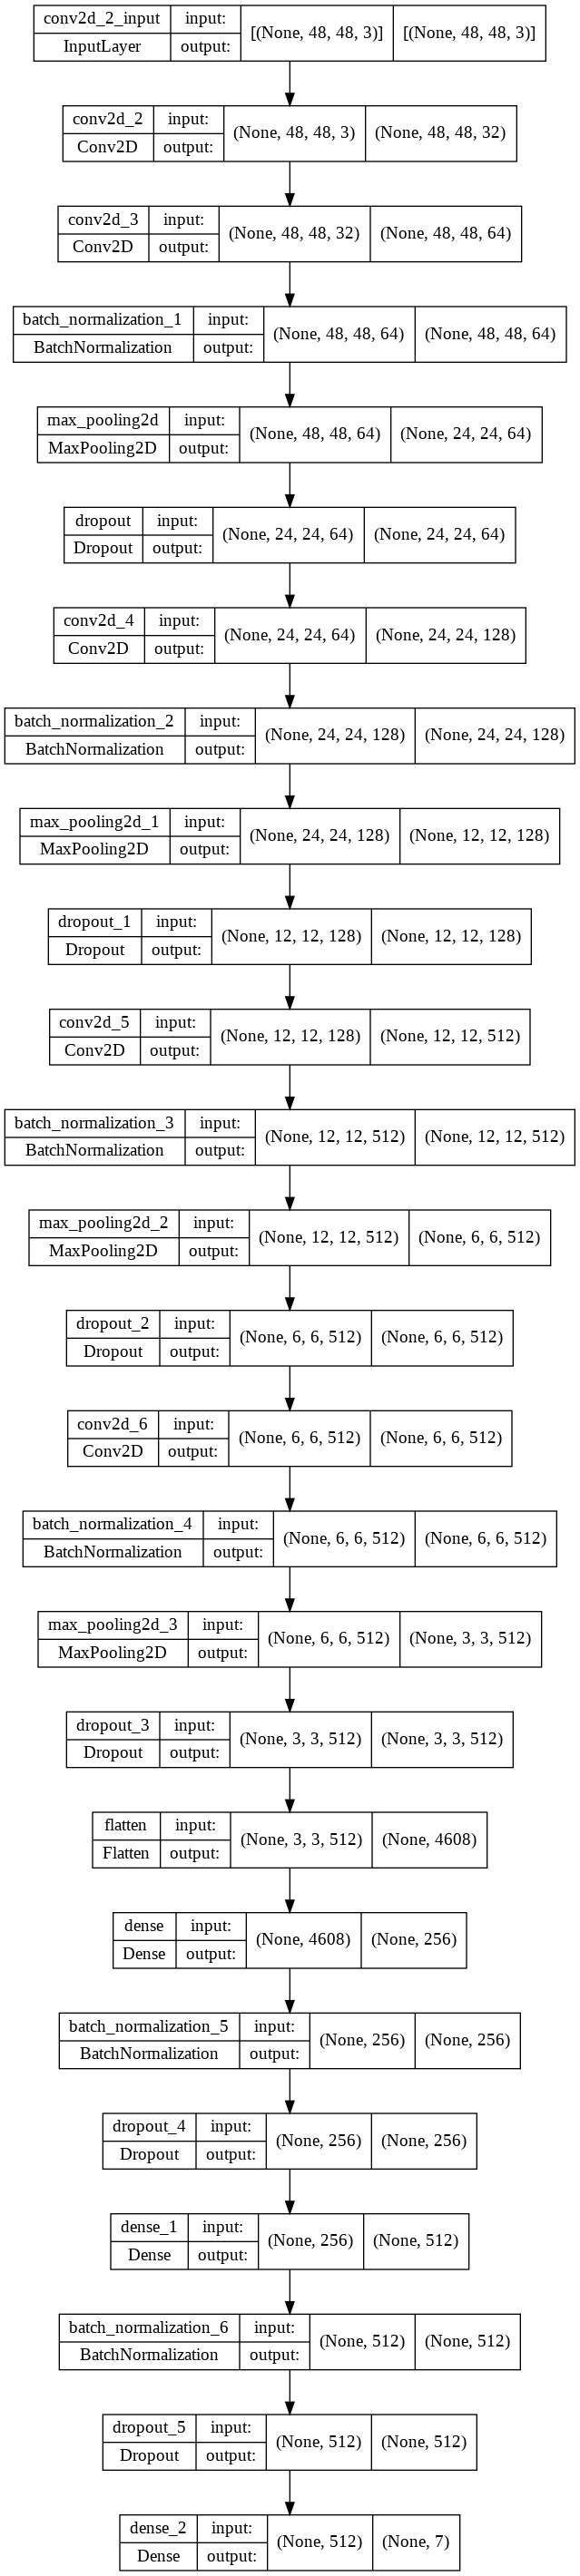

In [36]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='ModelWithoutTransferLearning.png', show_shapes=True,show_layer_names=True)
Image(filename='ModelWithoutTransferLearning.png')

In [39]:
history = model.fit(x = train_gen,epochs = 60,validation_data = validation_gen,callbacks=[early_stop, model_checkpoint])

Epoch 1/60
449/449 [==============================] - ETA: 0s - loss: 9.1426 - accuracy: 0.1996
Epoch 1: val_accuracy improved from -inf to 0.21608, saving model to best_model.h5
449/449 [==============================] - 51s 83ms/step - loss: 9.1426 - accuracy: 0.1996 - val_loss: 8.5019 - val_accuracy: 0.2161
Epoch 2/60
449/449 [==============================] - ETA: 0s - loss: 7.8343 - accuracy: 0.2394
Epoch 2: val_accuracy improved from 0.21608 to 0.29702, saving model to best_model.h5
449/449 [==============================] - 37s 82ms/step - loss: 7.8343 - accuracy: 0.2394 - val_loss: 7.0291 - val_accuracy: 0.2970
Epoch 3/60
449/449 [==============================] - ETA: 0s - loss: 6.5883 - accuracy: 0.2747
Epoch 3: val_accuracy improved from 0.29702 to 0.34271, saving model to best_model.h5
449/449 [==============================] - 37s 83ms/step - loss: 6.5883 - accuracy: 0.2747 - val_loss: 5.8210 - val_accuracy: 0.3427
Epoch 4/60
449/449 [==============================] - ETA:

## 7. Model with Transfer Learning

In [40]:
# using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')

base_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                          

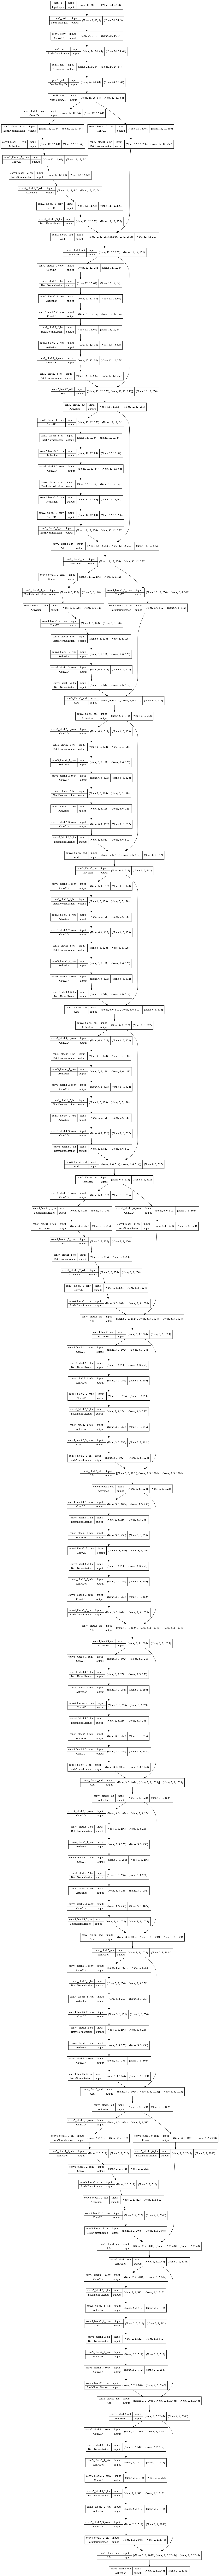

In [41]:
plot_model(base_model, to_file='base_model.png', show_shapes=True,show_layer_names=True)
Image(filename='base_model.png')

In [42]:
model_tl = Sequential()

model_tl.add(base_model)
model_tl.add(Dropout(0.5))
model_tl.add(Flatten())
model_tl.add(BatchNormalization())

model_tl.add(Dense(32,kernel_initializer='he_uniform'))
model_tl.add(BatchNormalization())
model_tl.add(Activation('relu'))
model_tl.add(Dropout(0.5))

model_tl.add(Dense(32,kernel_initializer='he_uniform'))
model_tl.add(BatchNormalization())
model_tl.add(Activation('relu'))
model_tl.add(Dropout(0.5))

model_tl.add(Dense(32,kernel_initializer='he_uniform'))
model_tl.add(BatchNormalization())
model_tl.add(Activation('relu'))
model_tl.add(Dense(7,activation='softmax'))

model_tl.compile(loss='categorical_crossentropy', 
                 optimizer=Adam(lr=0.0001, decay=1e-6), 
                 metrics=['accuracy'])

model_tl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_6 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_7 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


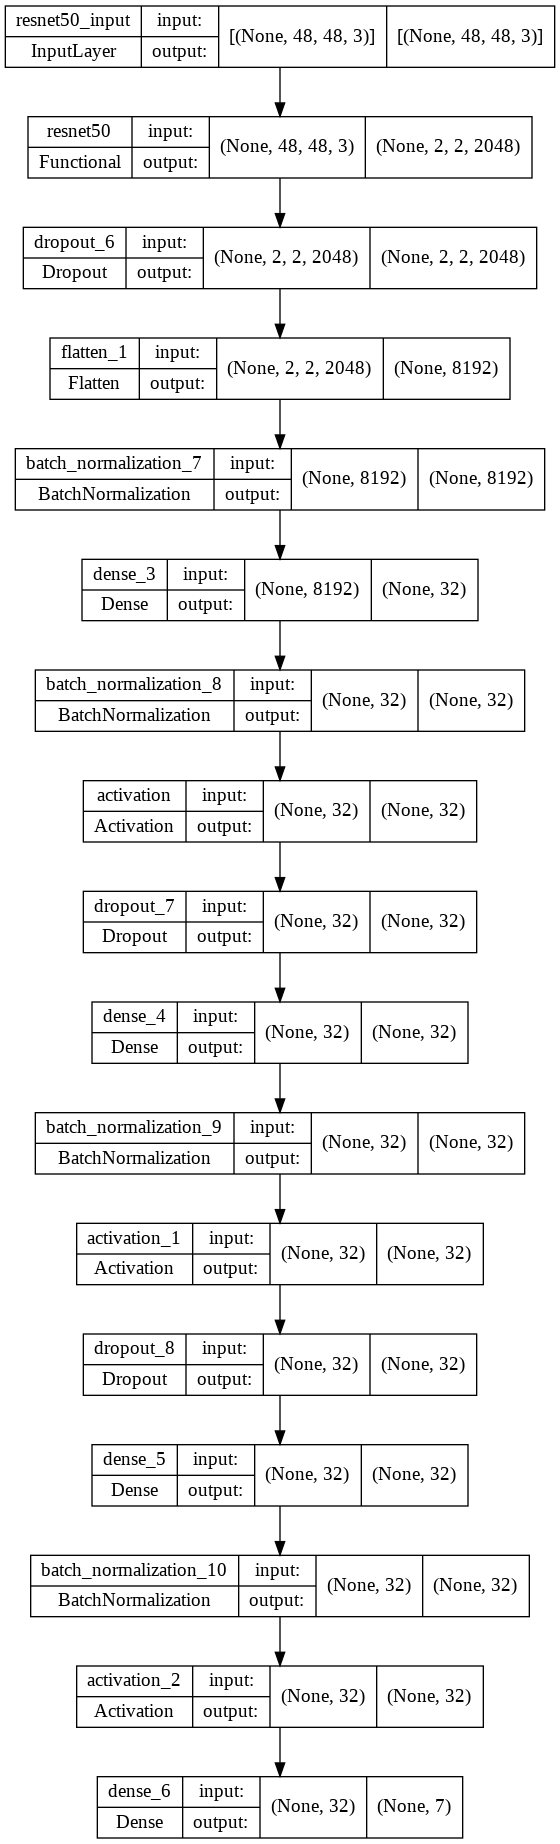

In [43]:
plot_model(model_tl, to_file='model_tl.png', show_shapes=True,show_layer_names=True)
Image(filename='model_tl.png')

In [44]:
local_reachability_density = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = 20,
                        verbose = 1,
                        factor = 0.50, 
                        min_lr = 1e-10)

early_stopping = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=8)

model_checkpoint = ModelCheckpoint('model_resnet.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

In [45]:
history = model_tl.fit_generator(train_gen,
                                      steps_per_epoch=28709 // 64,
                                      epochs = 60,
                                      validation_data = validation_gen,
                                      callbacks=[local_reachability_density,model_checkpoint,early_stopping],
                                      verbose = 1,
                                      validation_steps=7178 // 64)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


448/448 [==============================] - ETA: 0s - loss: 2.1077 - accuracy: 0.1760
Epoch 1: val_accuracy improved from -inf to 0.18527, saving model to model_resnet.h5
448/448 [==============================] - 56s 107ms/step - loss: 2.1077 - accuracy: 0.1760 - val_loss: 2.6221 - val_accuracy: 0.1853 - lr: 1.0000e-04
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 1.9236 - accuracy: 0.2568
Epoch 2: val_accuracy improved from 0.18527 to 0.25544, saving model to model_resnet.h5
448/448 [==============================] - 46s 102ms/step - loss: 1.9236 - accuracy: 0.2568 - val_loss: 1.8494 - val_accuracy: 0.2554 - lr: 1.0000e-04
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 1.8441 - accuracy: 0.2863
Epoch 3: val_accuracy improved from 0.25544 to 0.30985, saving model to model_resnet.h5
448/448 [==============================] - 45s 99ms/step - loss: 1.8441 - accuracy: 0.2863 - val_loss: 1.7621 - val_accuracy: 0.3098 - lr: 1.0000e-04
Epoch 4/60

### Model 3

In [82]:
#initialize image data generator with rescaling the image size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
# Preprocess all training images
train_generator = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')


# Preprocess all testing images
test_generator = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [85]:
# CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional layer 2
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional layer 3
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_24 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


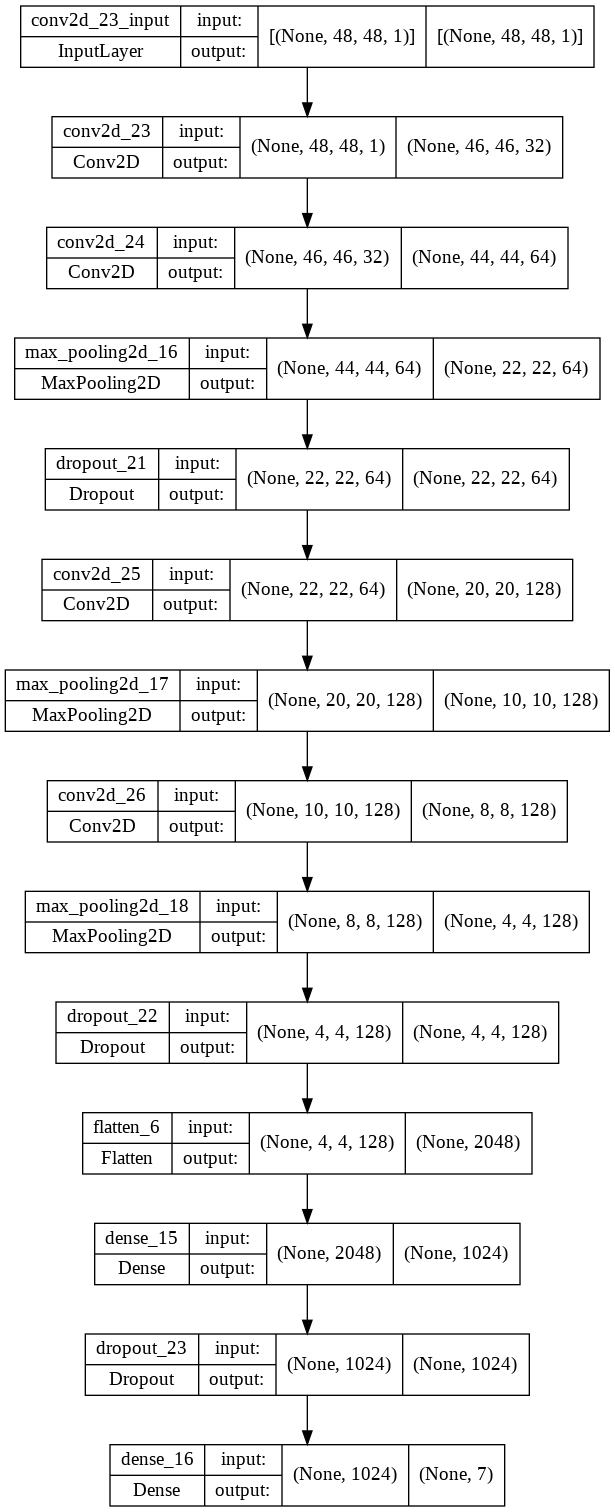

In [86]:
plot_model(model, to_file='model.png', show_shapes=True,show_layer_names=True)
Image(filename='model.png')

In [87]:
# Train the model
history = model.fit_generator(train_generator,
                              steps_per_epoch=28709 // 64,
                              epochs=50,
                              validation_data=test_generator,
                              validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


448/448 [==============================] - 12s 26ms/step - loss: 1.8029 - accuracy: 0.2581 - val_loss: 1.7109 - val_accuracy: 0.3407
Epoch 2/50
448/448 [==============================] - 11s 25ms/step - loss: 1.6311 - accuracy: 0.3668 - val_loss: 1.5531 - val_accuracy: 0.4043
Epoch 3/50
448/448 [==============================] - 11s 26ms/step - loss: 1.5350 - accuracy: 0.4117 - val_loss: 1.4949 - val_accuracy: 0.4247
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4601 - accuracy: 0.4390 - val_loss: 1.3995 - val_accuracy: 0.4632
Epoch 5/50
448/448 [==============================] - 12s 28ms/step - loss: 1.4004 - accuracy: 0.4684 - val_loss: 1.3585 - val_accuracy: 0.4821
Epoch 6/50
448/448 [==============================] - 12s 28ms/step - loss: 1.3476 - accuracy: 0.4886 - val_loss: 1.3028 - val_accuracy: 0.5085
Epoch 7/50
448/448 [==============================] - 11s 25ms/step - loss: 1.3026 - accuracy: 0.5086 - val_loss: 1.2699 - val_accuracy: 0.5180
Epo

In [88]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_weights.h5")

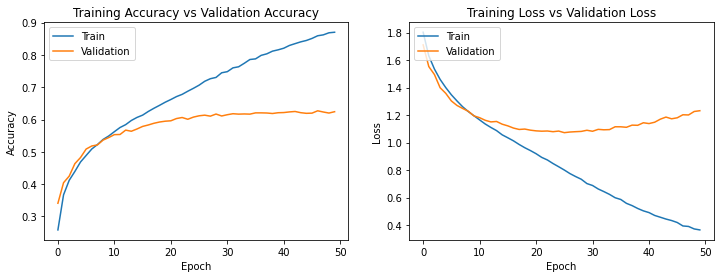

In [89]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [90]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.style.use('seaborn-darkgrid')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
classes= ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [106]:
test_path="/content/data/test"

test_datagen = ImageDataGenerator(rescale=1./255)

validate_gen = test_datagen.flow_from_directory('/content/data/test',
                                                target_size=(48, 48), 
                                                batch_size=64, 
                                                color_mode='grayscale', 
                                                class_mode='categorical',
                                                shuffle=False)

y_true = validate_gen.classes

y_hat =  model.predict(validate_gen)

y_hat = tf.argmax(y_hat, axis = 1).numpy()


Found 7178 images belonging to 7 classes.


In [107]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[ 498    6   91   68  113  159   23]
 [  25   64    8    4    2    7    1]
 [ 115    2  445   53  127  204   78]
 [  58    0   41 1486   97   62   30]
 [  95    2   64  110  731  211   20]
 [ 147    3  124  110  234  612   17]
 [  23    0   56   42   40   25  645]]


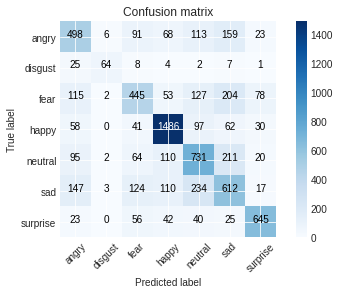

In [116]:
confusion_mat = confusion_matrix(y_true = y_true, y_pred = y_hat)

plot_confusion_matrix(confusion_mat, classes, cmap = 'Blues')

plt.savefig('confusion_mat.png')

In [111]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Models', 'Accuracy', 'Val Accuracy']
table.add_row(['Model without Transfer Learning', 0.6427, 0.6436])
table.add_row(['Model 2 with Transfer Learning', 0.7118, 0.6257])
table.add_row(['Model 3', 0.8702, 0.6242])
print(table)


+---------------------------------+----------+--------------+
|              Models             | Accuracy | Val Accuracy |
+---------------------------------+----------+--------------+
| Model without Transfer Learning |  0.6427  |    0.6436    |
|  Model 2 with Transfer Learning |  0.7118  |    0.6257    |
|             Model 3             |  0.8702  |    0.6242    |
+---------------------------------+----------+--------------+


### Observation:
1) Compared to Model 1, Model 2 and Model 3, Model 3 Performance of model 3 is More